In [1]:
import chess
import chess.engine
import random
import numpy

In [2]:
# Traduction de l'échiquier

# Dictionnaire représentant les index de l'échiquier
squares_i = {
    'a':0,
    'b':1,
    'c':2,
    'd':3,
    'e':4,
    'f':5,
    'g':6,
    'h':7
}

# Prend en paramètre un chiffre entre 0 et 63, et le traduit en
# tuple qui indique l'index du carré sur le jeu
# par exemple 0 est traduit par A1 qui est ensuite traduit par (7,0)
def translate_index(square):
    letters = chess.square_name(square)
    print(letters) # PRINT
    return 8 - int(letters[1]), squares_i[letters[0]]

print(translate_index(0)) # PRINT

a1
(7, 0)


In [3]:
# Création de l'échiquier de base
# Utilise chess pour générer un jeu de base qui ensuite est traduit 
# en une matrice représentant les différentes pièces du jeux ainsi que les deplacements
# des deux joueurs
board = chess.Board()
print(board) # PRINT

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [4]:
# Création du modèle de données de l'échiquier


# Fonction permettant de traduire l'échiquier de base en 14 matrices différentes
# représentant toutes les types de pièces sur le jeux ainsi quel les déplacements
# des deux joueurs.
# Retourne un "array" de 14 matrix contenant :
# matrix  0 : "Pawns" des blancs
# matrix  1 : "Knights" des blancs
# matrix  2 : "Bishops" des blancs
# matrix  3 : "Rooks" des blancs
# matrix  4 : "Queen" du blanc
# matrix  5 : "King" du blanc
# matrix  6 : "Pawns" des noirs
# matrix  7 : "Knights" des noirs
# matrix  8 : "Bishops" des noirs
# matrix  9 : "Rooks" des noirs
# matrix 10 : "Queen" du noir
# matrix 11 : "King" du noir
# matrix 12 : Déplacements légales des blancs
# matrix 13 : Déplacements légales des noirs
def create_3d_matrix_representation(board):
    
    board_matrix = numpy.zeros((14,8,8), dtype=numpy.int8)
    print(board_matrix) # PRINT
    
    for piece in chess.PIECE_TYPES: # Pour chaque type de pièce du jeu
        print(piece) # PRINT
        board_matrix[piece - 1] = create_matrix_by_piece(piece, chess.WHITE)
        board_matrix[piece + 5] = create_matrix_by_piece(piece, chess.BLACK)
    
    board_matrix[12] = create_matrix_by_turn(chess.WHITE)
    board_matrix[13] = create_matrix_by_turn(chess.BLACK)
    return board_matrix


# Fonction permettant de créer une matrix selon le type de pièce et la couleur du joueur
# Prend le type de la pièce (de 0 à 5) et le tour du joueur (True or False)
# Afin de recréer la matrix des pièces sur le jeu
# Retourne une matrix identifiant les pièces sur le jeu
def create_matrix_by_piece(piece, color):
    matrix = numpy.zeros((8,8), dtype=numpy.int8)
    for square in board.pieces(piece, color):
        print(square) # PRINT
        i = numpy.unravel_index(square,(8, 8))
        print(i) # PRINT
        matrix[7 - i[0]][i[1]] = 1
    return matrix


# Fonction permettant de créer une matrix selon les déplacements légales
# du joueur.
# Retourne une matrix identifiant chaque carré étant possible d'être jouer par le joueur
def create_matrix_by_turn(turn):
    temp = board.turn
    matrix = numpy.zeros((8,8), dtype=numpy.int8)
    board.turn = turn
    for move in board.legal_moves:
        i, j = translate_index(move.to_square)
        matrix[i][j] = 1
    board.turn = temp
    return matrix

print(create_3d_matrix_representation(board))

[[[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0

In [5]:
# Création du système de neurone à l'aide de Tensorflow
# Importation de TensorFlow pour utiliser l'API Keras
# Utilisé pour le système de neurones
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers

In [6]:
def build_model(conv_size, conv_depth):
    board_matrix = layers.Input(shape=(14,8,8))
    
    # Convulational Neural Networks
    # Détecte des "patterns" dans les matrices
    # ---
    # Utilise tout d'abord un "convulational layer" pour repérer les "patterns" dans les matrices
    # Le convulational layer utilise un filtre (qui est une matrice) et utilise ce filtre pour
    # "scanner" la matrice afin d'obtenir une deuxième matrice.
    # ---
    # Ensuite, un "flattening layer" utilise la matrice nouvellement créer par le "convulational layer"
    # et transforme la matrice de deux dimensions à un tableau à une dimension, afin d'être traiter par les
    # "layers" suivants.
    # ---
    # Ensuite, un "dense layer" permet d'effectuer, grâce aux noeuds dans le "layer", des opérations logiques
    # AND OR ou XOR, afin de consolider les valeurs convergentes et patterns.
    # Le type ReLU permet d'être plus rapide dans le choix des valeurs, retourne 64 unités.
    # ---
    # Ensuite, le dernier "dense layer" permet de consolider les données et de sortir une seule unité.
    # soit le choix le plus "optimal". Utilise un Sigmoid au lieu d'un ReLU, puisqu'il travail
    # avec moins de données.
    x = board_matrix
    for _ in range(conv_depth):
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', activation='relu', data_format='channels_first')(x)
        x = layers.Flatten()(x)
        x = layers.Dense(64, 'relu')(x)
        x = layers.Dense(1, 'sigmoid')(x)
        
        return models.Model(inputs=board_matrix, outputs=x)

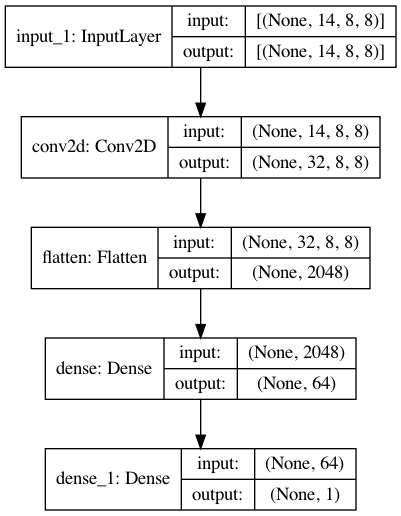

In [7]:
model = build_model(32, 4)
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [8]:
import tensorflow.keras.callbacks as callbacks


def get_dataset():
	container = numpy.load('dataset.npz')
	b, v = container['b'], container['v']
	v = numpy.asarray(v / abs(v).max() / 2 + 0.5, dtype=numpy.float32)
	return b, v


x_train, y_train = get_dataset()
print(x_train.shape)
print(y_train.shape)

(1500000, 14, 8, 8)
(1500000,)


In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=2048,
          epochs=1000,
          verbose=1,
          validation_split=0.1,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-4)])

model.save('model.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 8, 8)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 8, 8)          4064      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 135,265
Trainable params: 135,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
660/660 [==============================] - 35s 53ms/step - loss: 0.0020 - val_loss: 6.6061e-04
Epoch 2/1000
